# Room Cancellation Classification

In this assignment, you will be performing EDA and predictive modelling on a dataset of hotel reservations. The dataset is available from the attached `hotel_bookings.csv` file.

In this Jupyter notebook, please, document your results and the way you have obtained them. The results of each sub-question should be printed as the result of its corresponding cell.
Please make sure that the datasets and other outputs are easily identifiable, i.e. use descriptive names for as is suitable for each corresponding question.
Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner. _Please do not change the general structure of this notebook_. You can, however, **add additional markdown or code cells** if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

**Submission instructions**:
For submission, make a zip file containing your notebook and the attached dataset and name it as `<your_roll_number>_a3.zip` 

In [1]:
# Add all imports here

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import rcParams
from matplotlib import pyplot as plt
# add more when required
import seaborn as sns


rcParams["figure.figsize"] = 20, 10

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Description

[Original Source](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

This data consists of room reservations for two hotels: (i) a city hotel and (ii) a resort hotel. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


## Part 0

The `children`, `adults` and `babies` columns cannot have a value of zero simultaneously. Filter out the rows, which show this behavior

In [3]:

df=df[~((df['children']==0) & (df['adults']==0) & (df['babies']==0))]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Part A - EDA

To make ourselves familiar with the data, we will start with an explorative data analysis. In this part, you will be making different visualizations to support your answers.

For each sub-question, a separate and single subplot should be shown. You also need to decide the optimal visualization for each case and use that.

### Question 1

#### (a)
Determine and visualize the top 10 countries and guest counts from which the maximum number of guests are coming from.

#### (b)
Repeat (a) but show the guest counts for the city and resort hotels separately. They both should be shown in the same plot

#### (c)
Repeat (b) for the non-cancelled bookings


Each part should be done in a separate cell

  country  guests_count
0     PRT         20977
1     GBR          9668
2     FRA          8468
3     ESP          6383
4     DEU          6067
5     IRL          2542
6     ITA          2428
7     BEL          1868
8     NLD          1716
9     USA          1592


Text(0.5, 1.0, 'Country, Vistors graph')

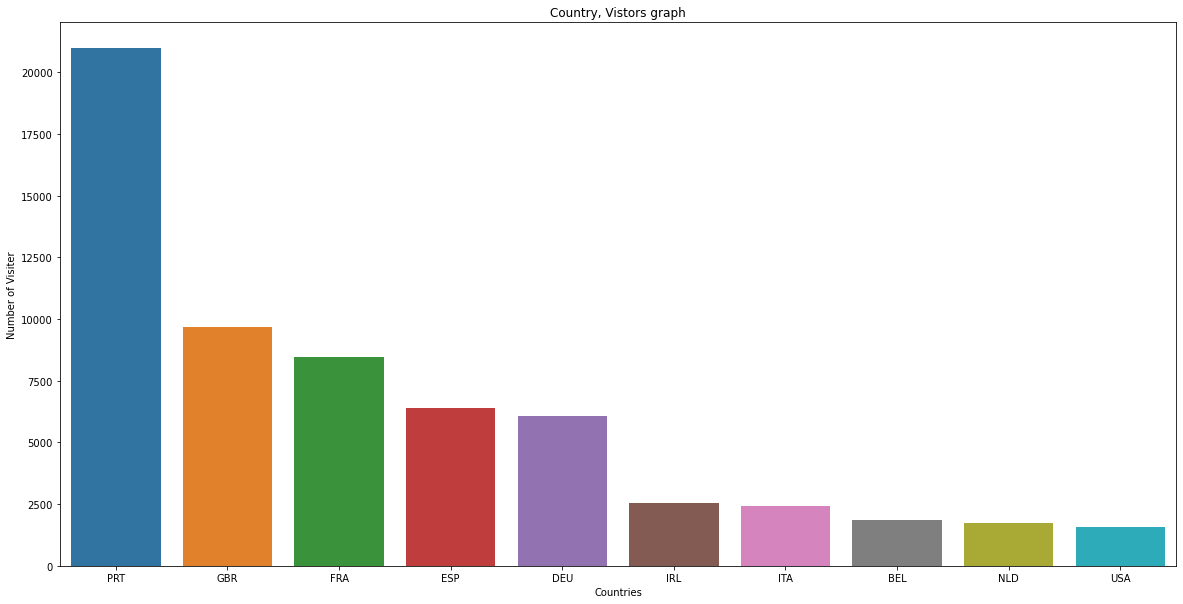

In [4]:
# Your code here (a)

df2=df[df["is_canceled"]==0]
df2=df2["country"].value_counts().reset_index(name="count")
df2.columns=['country','guests_count']
df2=df2[:10]
print(df2)
ax=sns.barplot(x="country",y="guests_count",data=df2)
ax.set(xlabel='Countries', ylabel='Number of Visiter')
plt.title("Country, Vistors graph")


           hotel country   size
8     City Hotel     PRT  30861
18  Resort Hotel     PRT  17622
3     City Hotel     FRA   8791
14  Resort Hotel     GBR   6813
1     City Hotel     DEU   6082
4     City Hotel     GBR   5307
2     City Hotel     ESP   4604
12  Resort Hotel     ESP   3956
6     City Hotel     ITA   3302
15  Resort Hotel     IRL   2166
0     City Hotel     BEL   1894
9     City Hotel     USA   1614
13  Resort Hotel     FRA   1610
7     City Hotel     NLD   1589
5     City Hotel     IRL   1208
11  Resort Hotel     DEU   1203
17  Resort Hotel     NLD    514
19  Resort Hotel     USA    479
16  Resort Hotel     ITA    459
10  Resort Hotel     BEL    448


Text(0.5, 1.0, 'Country and hotel Vistors graph')

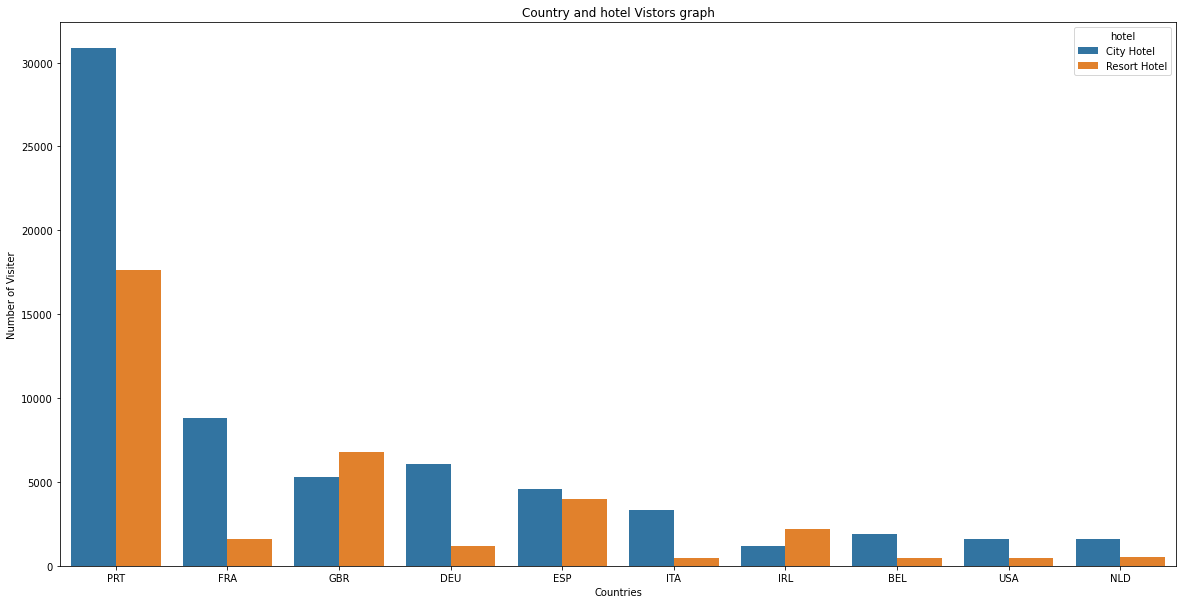

In [5]:
# Your code here (b)
df3=df[(df["country"].isin(df2["country"])) ]
df3 =df3.groupby(["hotel","country"], as_index=False)["country"].size()
df3.sort_values(by=["size"],ascending=False,inplace=True)
print(df3)

ax=sns.barplot(x='country',y="size",data=df3,hue='hotel')
ax.set(xlabel='Countries', ylabel='Number of Visiter')
plt.title("Country and hotel Vistors graph")

           hotel country   size
8     City Hotel     PRT  10793
18  Resort Hotel     PRT  10184
3     City Hotel     FRA   7069
14  Resort Hotel     GBR   5922
1     City Hotel     DEU   5010
4     City Hotel     GBR   3746
2     City Hotel     ESP   3278
12  Resort Hotel     ESP   3105
6     City Hotel     ITA   2049
15  Resort Hotel     IRL   1734
0     City Hotel     BEL   1479
13  Resort Hotel     FRA   1399
7     City Hotel     NLD   1258
9     City Hotel     USA   1185
11  Resort Hotel     DEU   1057
5     City Hotel     IRL    808
17  Resort Hotel     NLD    458
19  Resort Hotel     USA    407
10  Resort Hotel     BEL    389
16  Resort Hotel     ITA    379


Text(0.5, 1.0, 'Country and hotel Vistors graph')

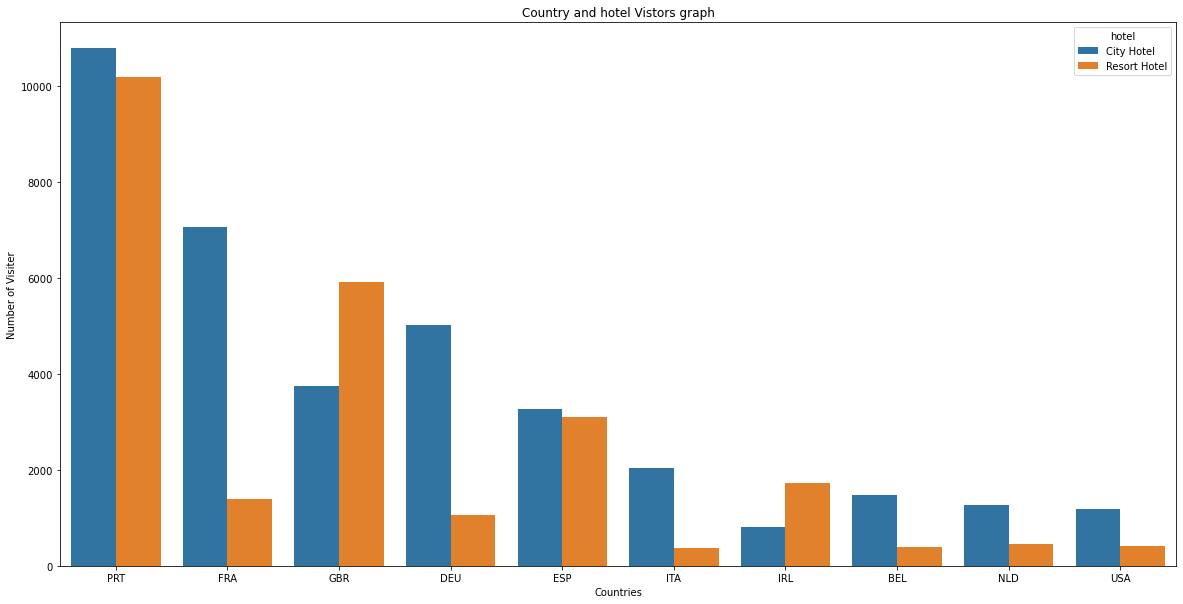

In [6]:
# Your code here (c)

#part(c)
df3=df[(df["is_canceled"]==0) & (df["country"].isin(df2["country"])) ]
df3 =df3.groupby(["hotel","country"], as_index=False)["country"].size()
df3.sort_values(by=["size"],ascending=False,inplace=True)
print(df3)

ax=sns.barplot(x='country',y="size",data=df3,hue='hotel')
ax.set(xlabel='Countries', ylabel='Number of Visiter')
plt.title("Country and hotel Vistors graph")

### Question 2
Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of the average amount (adr), the guests are charged per night for each room type.

#### (b)
Repeat (a) but separate the results for each hotel. A single plot should be shown


  assigned_room_type         avg
0                  A   92.741980
1                  B   94.926598
2                  C  106.808841
3                  D  100.886631
4                  E  111.495231
5                  F  142.025103
6                  G  158.108185
7                  H  157.962646
8                  I   40.558729
9                  K   71.760511


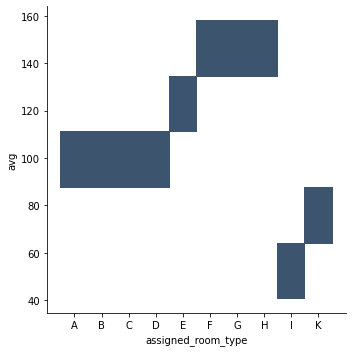

In [7]:
# Your code here (a)
a= df[df["is_canceled"]==0]
avg_amnt_room_type =a.groupby('assigned_room_type', as_index=False)['adr'].mean()
avg_amnt_room_type=avg_amnt_room_type.rename(columns={"adr":"avg"})
print(avg_amnt_room_type)
sns.displot(x="assigned_room_type", y="avg", data=avg_amnt_room_type)

   assigned_room_type         hotel         AVG
0                   A    City Hotel   97.372345
1                   A  Resort Hotel   80.075009
2                   B    City Hotel   94.186973
3                   B  Resort Hotel  102.288333
4                   C    City Hotel  101.924196
5                   C  Resort Hotel  107.201039
6                   D    City Hotel  116.017687
7                   D  Resort Hotel   81.263398
8                   E    City Hotel  138.726230
9                   E  Resort Hotel  100.977986
10                  F    City Hotel  171.039269
11                  F  Resort Hotel  117.310741
12                  G    City Hotel  177.429208
13                  G  Resort Hotel  148.970516
14                  H  Resort Hotel  157.962646
15                  I  Resort Hotel   40.558729
16                  K    City Hotel   71.760511


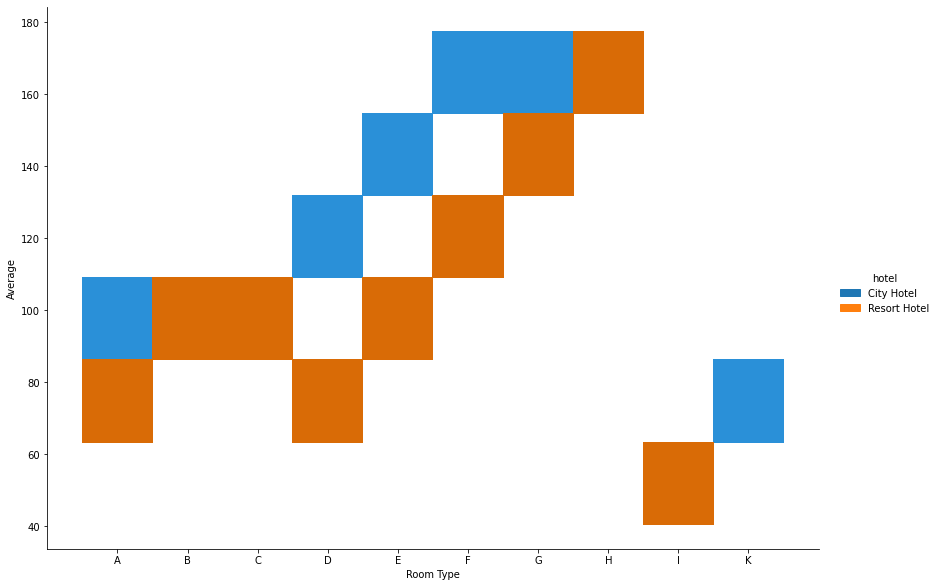

In [8]:
# Your code here (b)
avg_amnt_room_hotel_grpby=a.groupby(['assigned_room_type',"hotel"], as_index=False)['adr'].mean()
avg_amnt_room_hotel_grpby=avg_amnt_room_hotel_grpby.rename(columns={"adr":"AVG"})
print(avg_amnt_room_hotel_grpby)
ax=sns.displot(x="assigned_room_type",y="AVG",hue="hotel", data=avg_amnt_room_hotel_grpby,height=8.27, aspect=11.7/8.27)
ax.set(xlabel='Room Type', ylabel='Average')


### Question 3
Consider the non-cancelled bookings only.

#### (a)
Plot the mean values for `adr` by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the mean values for `adr` by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.



           hotel arrival_date_month        avg
0     City Hotel            January  82.330983
12  Resort Hotel            January  48.761125
1     City Hotel           February  86.520062
13  Resort Hotel           February  54.147478
2     City Hotel              March  90.658533


<ipython-input-9-9f8e5003964a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["arrival_date_month"] = a["arrival_date_month"].map(new_order)


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Average Value')]

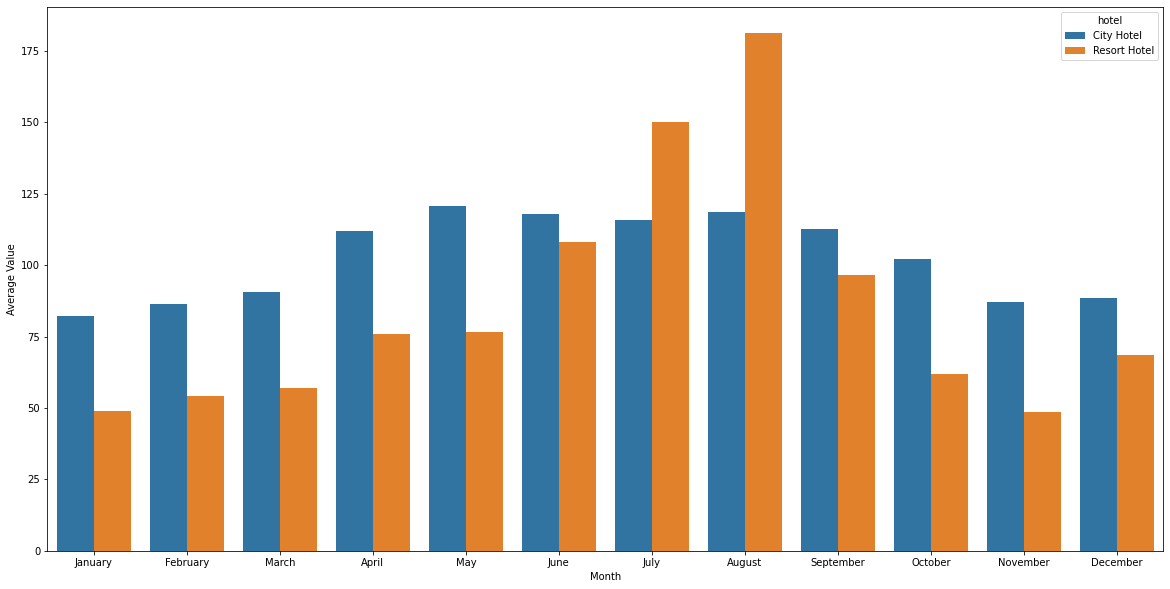

In [9]:
# Your code here (a)
a= df[df["is_canceled"]==0]

new_order = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
a["arrival_date_month"] = a["arrival_date_month"].map(new_order)

b=a.groupby(["hotel","arrival_date_month"], as_index=False)['adr'].mean()

b.sort_values(by=["arrival_date_month"],inplace=True)
new_order = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
b["arrival_date_month"] = b["arrival_date_month"].map(new_order)

b=b.rename(columns={"adr":"avg"})
print(b[:5])

ax=sns.barplot(x="arrival_date_month", y="avg",hue="hotel", data=b)
ax.set(xlabel='Month', ylabel='Average Value')

          hotel  arrival_date_day_of_month         AVG
1    City Hotel                          1  106.611725
8  Resort Hotel                          1   92.690269
2    City Hotel                          2  106.079712
9  Resort Hotel                          2   91.589828
3    City Hotel                          3  105.472273


<ipython-input-10-fac97fa20499>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["arrival_date_day_of_month"] = a["arrival_date_day_of_month"]%7


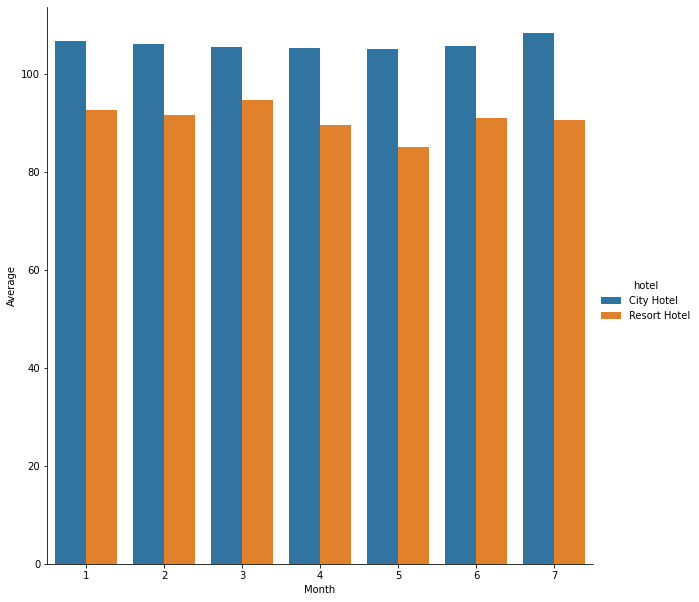

In [10]:

# Your code here (B)

a= df[df["is_canceled"]==0]
a["arrival_date_day_of_month"] = a["arrival_date_day_of_month"]%7

a=a.groupby(["hotel","arrival_date_day_of_month"], as_index=False)['adr'].mean()
a=a.rename(columns={"adr":"AVG"})
a = a.replace({'arrival_date_day_of_month': {0: 7}}) 
a.sort_values(by=["arrival_date_day_of_month"],inplace=True)

print(a[:5])

ax=sns.catplot(x="arrival_date_day_of_month", y="AVG",hue="hotel", data=a,kind="bar",height=8.27)
ax.set(xlabel='Month', ylabel='Average')


### Question 4

Consider the non-cancelled bookings only.

#### (a)

Plot the guest counts by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the guest counts by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

<ipython-input-11-759c09d8dc1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["arrival_date_month"] = a["arrival_date_month"].map(new_order)


   arrival_date_month         hotel  size
0             January    City Hotel  2249
1             January  Resort Hotel  1866
2            February    City Hotel  3051
3            February  Resort Hotel  2308
4               March    City Hotel  4049
5               March  Resort Hotel  2571
6               April    City Hotel  4010
7               April  Resort Hotel  2550
8                 May    City Hotel  4568
9                 May  Resort Hotel  2535
11               June  Resort Hotel  2037
10               June    City Hotel  4358
12               July    City Hotel  4770
13               July  Resort Hotel  3137
14             August    City Hotel  5367
15             August  Resort Hotel  3257
16          September    City Hotel  4283
17          September  Resort Hotel  2102
18            October    City Hotel  4326
19            October  Resort Hotel  2575
20           November    City Hotel  2676
21           November  Resort Hotel  1975
22           December    City Hote

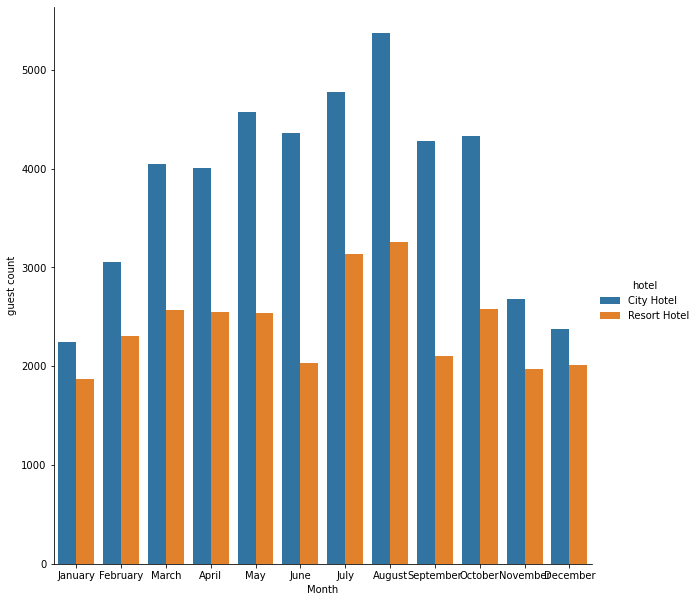

In [11]:
# Your code here (a)

a= df[df["is_canceled"]==0]

new_order = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
a["arrival_date_month"] = a["arrival_date_month"].map(new_order)


a=a.groupby(["arrival_date_month","hotel"], as_index=False)['country'].size()
#a["sum"] = a["adults"]+a["children"]+a["babies"]

a.sort_values(by=["arrival_date_month"],inplace=True)
new_order = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
a["arrival_date_month"] = a["arrival_date_month"].map(new_order)

print(a)

ax=sns.catplot(x="arrival_date_month", y="size",hue="hotel", data=a,kind="bar",height=8.27)
ax.set(xlabel='Month', ylabel='guest count')


<ipython-input-12-7a32dbffd4f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["arrival_date_day_of_month"] = a["arrival_date_day_of_month"]%7


   arrival_date_day_of_month         hotel  size
0                          1    City Hotel  6973
1                          1  Resort Hotel  4565
2                          2    City Hotel  7428
3                          2  Resort Hotel  5128
4                          3    City Hotel  6894


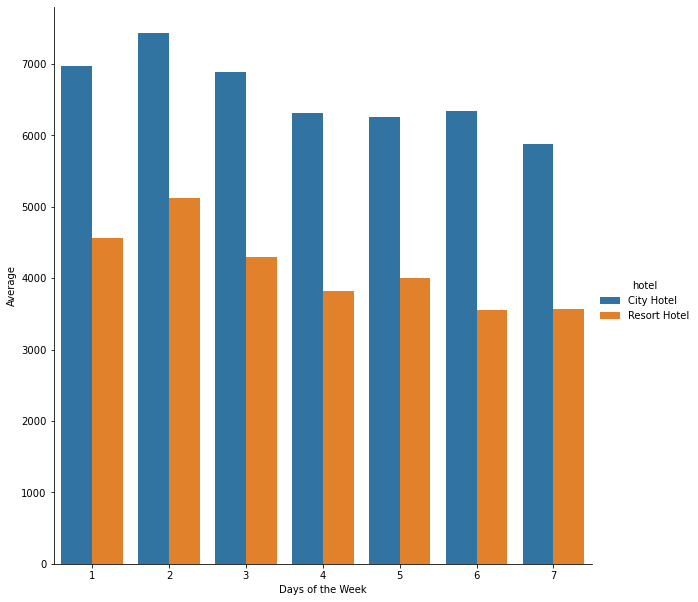

In [12]:
# Your code here (b)
a= df[df["is_canceled"]==0]
a["arrival_date_day_of_month"] = a["arrival_date_day_of_month"]%7

a = a.replace({'arrival_date_day_of_month': {0: 7}}) 
a.sort_values(by=["arrival_date_day_of_month"],inplace=True)


a=a.groupby(["arrival_date_day_of_month","hotel"], as_index=False)['country'].size()



print(a[:5])

ax=sns.catplot(x="arrival_date_day_of_month", y="size",hue="hotel", data=a,kind="bar",height=8.27)
ax.set(xlabel='Days of the Week', ylabel='Average')



### Question 5

Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of stay duration (in number of days) of guests at each hotel.

<ipython-input-13-c7d6fd4e25df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['reservation_status_date']=pd.to_datetime(a["reservation_status_date"])
<ipython-input-13-c7d6fd4e25df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["arrival_date_month"] = a["arrival_date_month"].map(new_order)
<ipython-input-13-c7d6fd4e25df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

[ 0  1  2  4  5  6  7 14 15 11  3  8  9 10 13 12 46 18 28 21 17 22 29 19
 42 16 60 69 30 35 23 45 56 25 38 20 48 24 34]


Text(0.5, 1.0, 'distribution of stay duration')

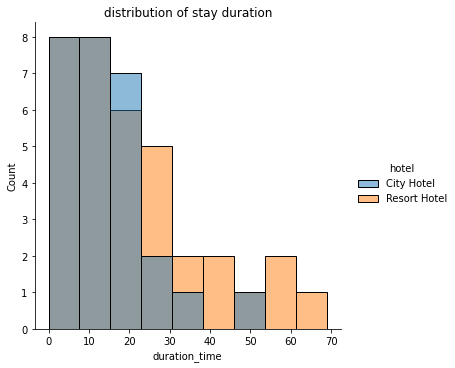

In [13]:

a=df[df["is_canceled"]==0]

a['reservation_status_date']=pd.to_datetime(a["reservation_status_date"])
new_order = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
a["arrival_date_month"] = a["arrival_date_month"].map(new_order)

a["arrival_date"]=a["arrival_date_year"].astype(str)+"-"+a["arrival_date_month"].astype(str)+"-"+a["arrival_date_day_of_month"].astype(str)
a["arrival_date"]=pd.to_datetime(a["arrival_date"],errors='coerce')
a['reservation_status_date'] = pd.to_datetime(a['reservation_status_date'])


a["duration_time"]=(a['reservation_status_date'] - a["arrival_date"])
a["duration_time"]= a['duration_time'].dt.days
print(a['duration_time'].unique())

a=a.groupby(['duration_time',"hotel"])['duration_time'].size()

sns.displot(a,x="duration_time",hue="hotel")
plt.title("distribution of stay duration")

### Question 6

#### (a), (b) & (c)
Make three visualizations, showing some interesting insights from the data. 

The visualizations should be accompanied by a brief textual description highlighting your finding.

    country  is_canceled
97      PRT        27506
41      GBR         2452
33      ESP         2177
38      FRA         1933
60      ITA         1333
27      DEU         1218
56      IRL          832
16      BRA          830
119     USA          501
9       BEL          474


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cancelation Country')

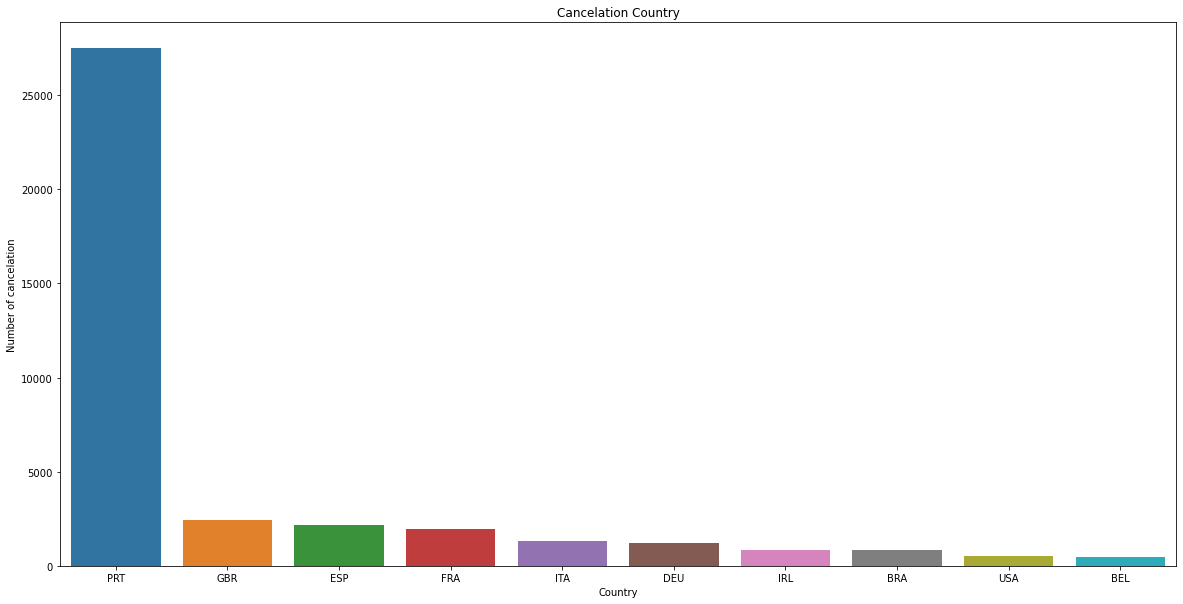

In [14]:
# Your code here (a)
#this visualization shows the country where the most cancelation has been occured as you can observe in portigal there a most cancelation
a= df[df["is_canceled"]==1]
a=a.groupby(["country"],as_index=False)["is_canceled"].count()
a=a.sort_values(by=["is_canceled"],ascending=False)
a=a[:10]
print(a)
ax= sns.barplot("country",x="country",y="is_canceled",data=a)
ax.set(xlabel='Country', ylabel='Number of cancelation')
plt.title("Cancelation Country")


    country  children  babies     sum
125     PRT    2005.0     322  2327.0
50      ESP     904.0     110  1014.0
54      FRA     878.0      68   946.0
57      GBR     790.0      88   878.0
42      DEU     347.0      15   362.0


<ipython-input-15-d4b4e992f111>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=a.groupby(["country"],as_index=False)["children","babies"].sum()
/home/abdulqadir/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countries Visisted By Families')

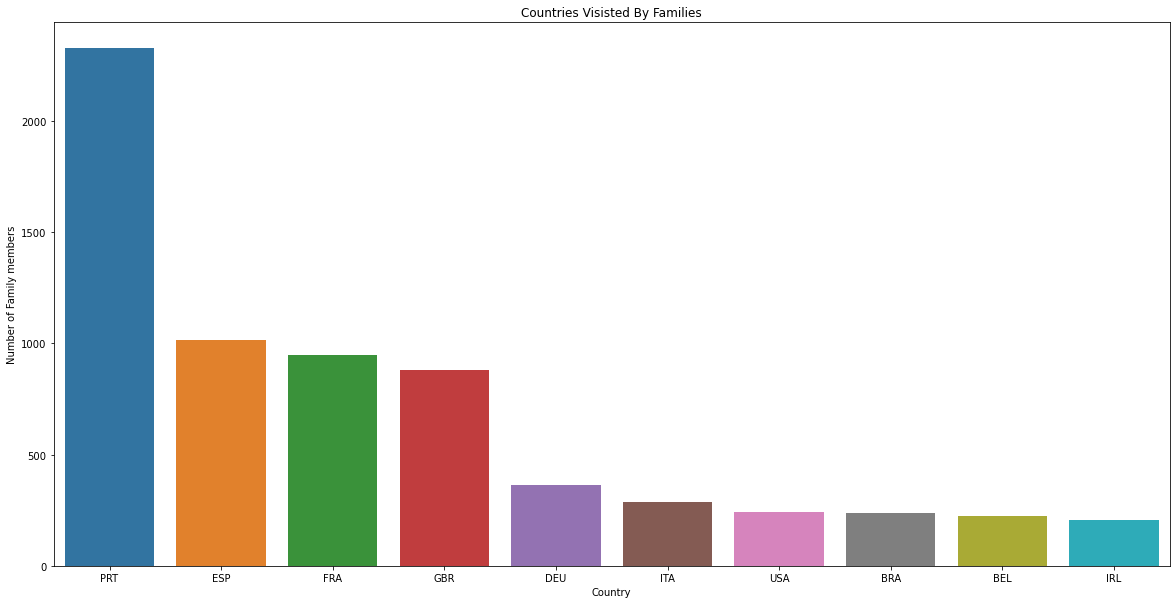

In [15]:
# Your code here (b)
'''
below visualization shows the countries where most families visit 
as the result are visalized by seeing the number of
children and babies from the data
after portugal espain is most visited by the families 
'''

a= df[df["is_canceled"]==0]
a=a.groupby(["country"],as_index=False)["children","babies"].sum()
a["sum"]= a["babies"]+a["children"]
a=a.sort_values(by=["sum"],ascending=False)
print(a[:5])
ax= sns.barplot("country",x="country",y="sum",data=a[:10])
ax.set(xlabel='Country', ylabel='Number of Family members')
plt.title("Countries Visisted By Families")

<ipython-input-16-240381d1d277>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a =a.groupby(["country",'arrival_date_month'], as_index=False)['babies',"children","adults"].sum()


    country arrival_date_month  babies  children  adults     sum
783     PRT             August      87     540.0    4488  5115.0
787     PRT               July      47     405.0    4319  4771.0
785     PRT           February      24     129.0    3094  3247.0
789     PRT              March      20     107.0    2948  3075.0
792     PRT            October      10      76.0    2979  3065.0
793     PRT          September      26      97.0    2802  2925.0
784     PRT           December      24     156.0    2704  2884.0
312     ESP             August      24     261.0    2485  2770.0
788     PRT               June      17     130.0    2495  2642.0
782     PRT              April      15     105.0    2462  2582.0


Text(0.5, 1.0, 'Number of Visiters in Month')

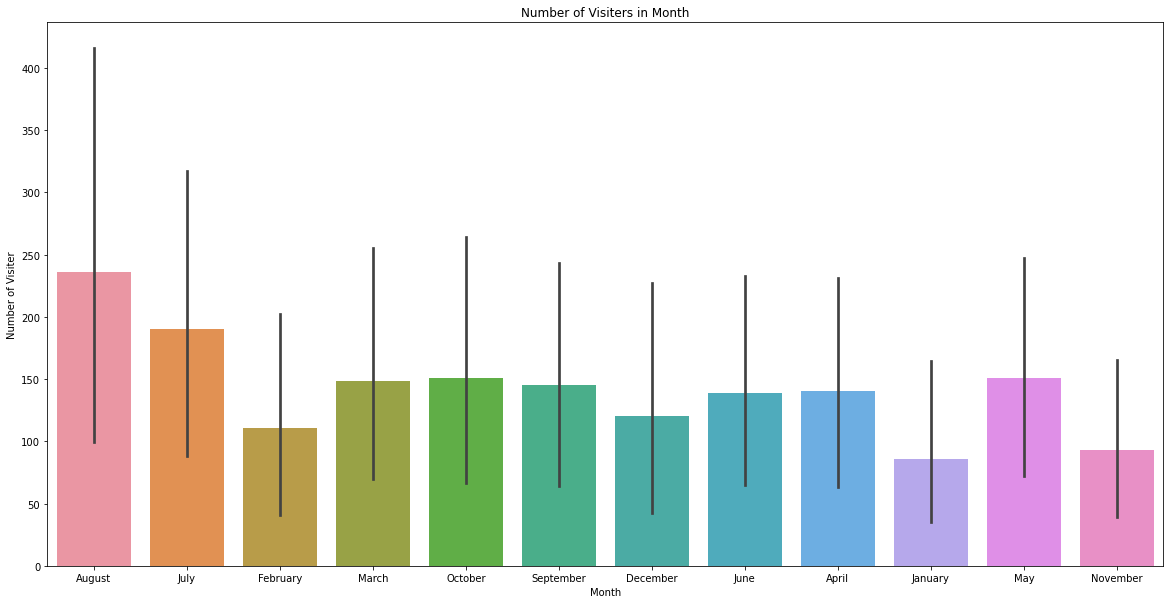

In [16]:
# Your code here (c)
"""
This visualization shows the number of visitors according to month
it will help to analyze the visitor flow
most visitors like to visit in August
""" 

a= df[df["is_canceled"]==0]
a =a.groupby(["country",'arrival_date_month'], as_index=False)['babies',"children","adults"].sum()
a["sum"] = a["babies"]+a["children"]+a["adults"]
a.sort_values(by=["sum"],inplace=True,ascending=False)
print(a[:10])
ax=sns.barplot(x="arrival_date_month", y="sum", data=a,)
ax.set(xlabel='Month', ylabel='Number of Visiter')
plt.title("Number of Visiters in Month")

## Part B - Pre-processing

For this part, **you are required to document the reasoning behind all the data transformations you devise and the insights you gain from each question.** Create **markdown cells** to add your answers. 

### Task Description

The task is to classify whether a booking will be cancelled or not. 


### Question 1
**Feature Selection**

#### (a)
List the features which seem to contribute to data leakage. These will be the features which are related to the predicitve target, but would not be available at prediction time in a real-world setting. 

#### (b)
Find out the percent of missing values of each column and visualize using [missingno](https://github.com/ResidentMario/missingno) . Which features have too many missing values? And which features have sufficiently low number of missing values, such that they can be safely imputed without significantly affecting the overall data distribution.

#### (c)
Visualize the correlations among the different input features.

#### (d)
Find out the correlation of each of the input features with the target attribute.

#### (e)
Using your answers to the previous parts, filter out the irrelevant features from the dataset.

Remember to document your findings for each part.

In [17]:
# Your code here (a)
'''
However, to predict whether or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.

I will also not include days_in_waiting_list,booking changes and arrival_date_year.

The most important feature to exclude is the "reservation_status":
'''
list_not=['days_in_waiting_list','arrival_date_year',"reservation_status"]
num_features=[col for col in df.columns if df[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

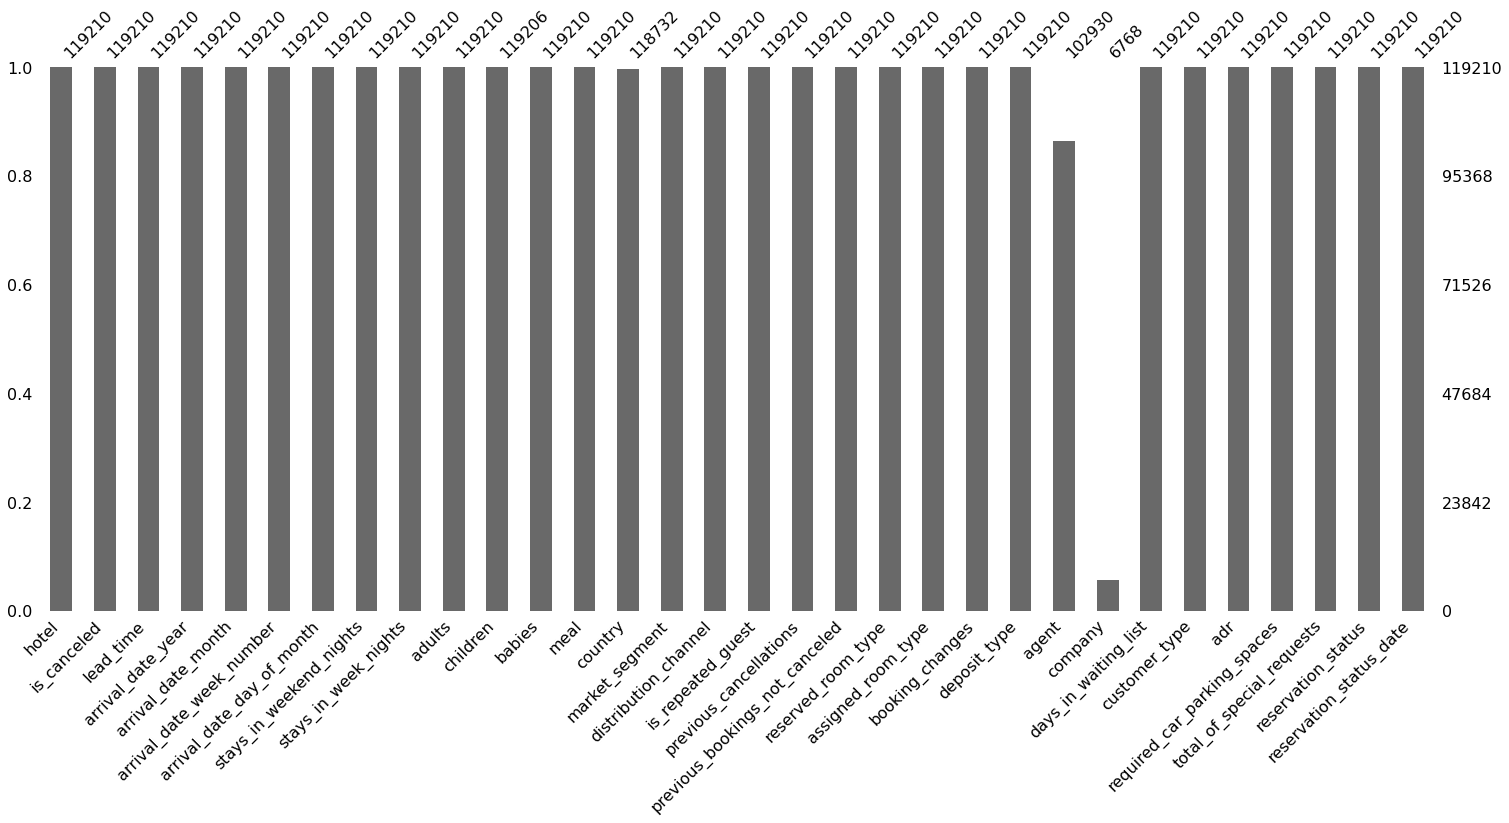

In [18]:
# Your code here (b)
msno.bar(df)
df = df.fillna(0)

<AxesSubplot:>

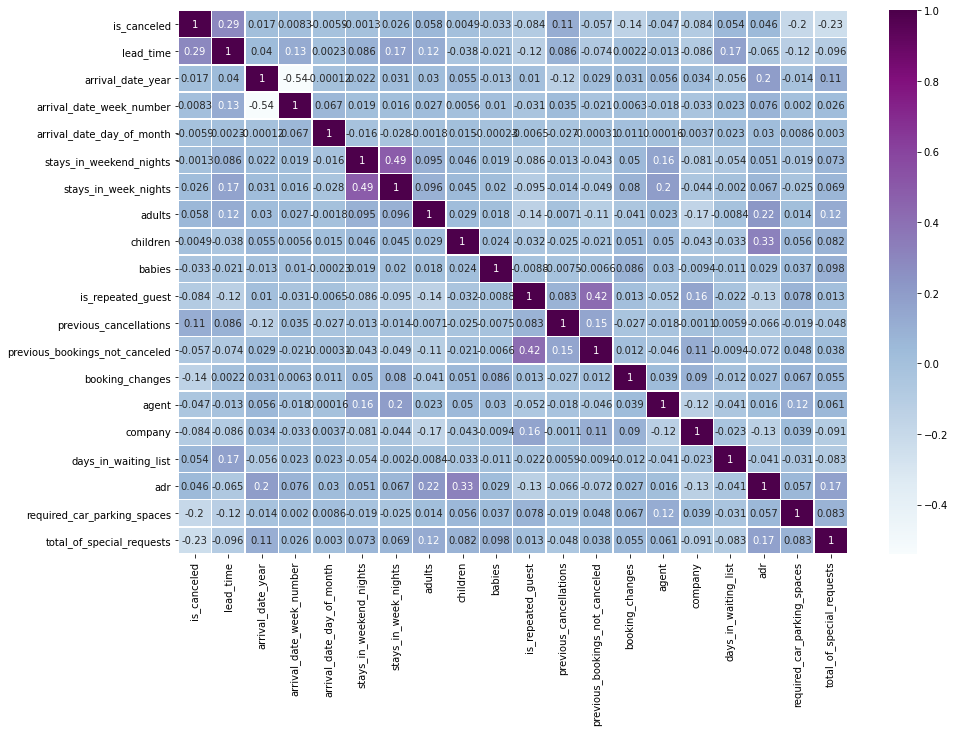

In [19]:
# Your code here (c)
co_relation=df.corr()
co_relation
plt.figure(figsize=(15,10))
sns.heatmap(co_relation, annot=True, cmap='BuPu', linewidths=.5)


In [20]:
# Your code here (d)
co_relation=df.corr()["is_canceled"]
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [21]:
# Your code here (e)
x = co_relation
x= x.abs().sort_values(ascending=False).reset_index()
print((x["index"]))
my_colums = list(x["index"])
my_colums
df = df[my_colums]
df

0                        is_canceled
1                          lead_time
2          total_of_special_requests
3        required_car_parking_spaces
4                    booking_changes
5             previous_cancellations
6                  is_repeated_guest
7                            company
8                             adults
9     previous_bookings_not_canceled
10              days_in_waiting_list
11                             agent
12                               adr
13                            babies
14              stays_in_week_nights
15                 arrival_date_year
16          arrival_date_week_number
17         arrival_date_day_of_month
18                          children
19           stays_in_weekend_nights
Name: index, dtype: object


,is_canceled,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,company,adults,previous_bookings_not_canceled,days_in_waiting_list,agent,adr,babies,stays_in_week_nights,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,children,stays_in_weekend_nights
0,0,342,0,0,3,0,0,0.0,2,0,0,0.0,0.00,0,0,2015,27,1,0.0,0
1,0,737,0,0,4,0,0,0.0,2,0,0,0.0,0.00,0,0,2015,27,1,0.0,0
2,0,7,0,0,0,0,0,0.0,1,0,0,0.0,75.00,0,1,2015,27,1,0.0,0
3,0,13,0,0,0,0,0,0.0,1,0,0,304.0,75.00,0,1,2015,27,1,0.0,0
4,0,14,1,0,0,0,0,0.0,2,0,0,240.0,98.00,0,2,2015,27,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,0,0,0,0,0,0.0,2,0,0,394.0,96.14,0,5,2017,35,30,0.0,2
119386,0,102,2,0,0,0,0,0.0,3,0,0,9.0,225.43,0,5,2017,35,31,0.0,2
119387,0,34,4,0,0,0,0,0.0,2,0,0,9.0,157.71,0,5,2017,35,31,0.0,2
119388,0,109,0,0,0,0,0,0.0,2,0,0,89.0,104.40,0,5,2017,35,31,0.0,2


### Question 2

For this question, use sklearn transformations. 

Develop appropriate encoding and scaling steps for the categorical and numerical columns in your dataset respectively. 

For this question, a single sklearn `Transformer` should be developed which can be applied for the entire dataset.
If separate transformations need to be applied for different columns, then compose them into a single transformation using sklearn's `ColumnTransformer`.  

In [22]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score


Accuracy_list = []
Balanced_accuracy_list = []
F1_score_list = []
ROC_AUC_list = []
Average_precision_list = []






## Part C - Modeling

Now, you will be training different ML models to perform the required predictive task. Specifically, the following classification models will be trained:
* kNN
* Naive Bayes
* Decision tree
* [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) 

### Question 1

Split your data into training and testing data, with 85% of the dataset going to testing data. Set a suitable seed value so that the splits are reproducible

In [23]:
### Your code here
X=df.drop('is_canceled',axis=1)
y=df['is_canceled']
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.15,random_state=0)

### Question 2

For each of the required models perform the following tasks:
* Compose an sklearn pipeline with the developed pre-processing (developed in the previous part) and the model.
* Train the model with default hyper-parameters and report its evlauation score on the test set.
* Tune the hyper-parameters of the model with `GridSearchCV`.
* Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set.

#### kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),MinMaxScaler(), KNeighborsClassifier())
print(pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'polynomialfeatures', 'minmaxscaler', 'kneighborsclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])


In [25]:
param_grid = {'kneighborsclassifier__n_neighbors':[1,2,3],
             'polynomialfeatures__degree': [1, 2, 3],
             'minmaxscaler__feature_range' : [(0,1), (-100,10)]
             }

grid = GridSearchCV(pipe, param_grid, cv=2)
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3],
                         'minmaxscaler__feature_range': [(0, 1), (-100, 10)],
                         'polynomialfeatures__degree': [1, 2, 3]})

In [26]:
print("Best parameters: {}".format(grid.best_params_))
y_pred = grid.predict(test_X)
acc_score = accuracy_score(test_y, y_pred)                           
avg_prc_scr = average_precision_score(test_y, y_pred)                         
f1_scr  = f1_score(test_y, y_pred)  
bal_acc_scr = balanced_accuracy_score(test_y, y_pred)                           
roc_auc_scr = roc_auc_score(test_y, y_pred)
                           
Accuracy_list.append(acc_score)  
Balanced_accuracy_list.append(bal_acc_scr)
F1_score_list.append(f1_scr)
ROC_AUC_list.append(roc_auc_scr)
Average_precision_list.append(avg_prc_scr)

Best parameters: {'kneighborsclassifier__n_neighbors': 2, 'minmaxscaler__feature_range': (0, 1), 'polynomialfeatures__degree': 1}


#### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),MinMaxScaler(), GaussianNB())

In [28]:

param_grid = {'gaussiannb__var_smoothing': np.logspace(0,-9, num=100),
             'polynomialfeatures__degree': [1, 2, 3],
             'minmaxscaler__feature_range' : [(0,1), (-100,10)]
             }
grid = GridSearchCV(pipe, param_grid, cv=2)
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('gaussiannb', GaussianNB())]),
             param_grid={'gaussiannb__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09]),
                         'minmaxscaler__feature_range': [(0, 1), (-100, 10)],
    

In [29]:
print("Best parameters: {}".format(grid.best_params_))
y_pred = grid.predict(test_X)
acc_score = accuracy_score(test_y, y_pred)                           
avg_prc_scr = average_precision_score(test_y, y_pred)                         
f1_scr  = f1_score(test_y, y_pred)  
bal_acc_scr = balanced_accuracy_score(test_y, y_pred)                           
roc_auc_scr = roc_auc_score(test_y, y_pred)
                           
Accuracy_list.append(acc_score)  
Balanced_accuracy_list.append(bal_acc_scr)
F1_score_list.append(f1_scr)
ROC_AUC_list.append(roc_auc_scr)
Average_precision_list.append(avg_prc_scr)

Best parameters: {'gaussiannb__var_smoothing': 0.43287612810830584, 'minmaxscaler__feature_range': (0, 1), 'polynomialfeatures__degree': 1}


#### Decision Tree

In [30]:
from sklearn import tree

In [31]:
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),MinMaxScaler(), tree.DecisionTreeClassifier())#'var_smoothing': np.logspace(0,-9, num=100)
print(pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'polynomialfeatures', 'minmaxscaler', 'decisiontreeclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])


In [32]:

param_grid = {'decisiontreeclassifier__criterion':['gini','entropy'],
              'decisiontreeclassifier__max_depth':[4,5,6,7],
             'polynomialfeatures__degree': [1, 2, 3],
              'minmaxscaler__feature_range' : [(0,1), (-100,10)]
             }
grid = GridSearchCV(pipe, param_grid, cv=2)
grid.fit(train_X, train_y)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [4, 5, 6, 7],
                         'minmaxscaler__feature_range': [(0, 1), (-100, 10)],
                         'polynomialfeatures__degree': [1, 2, 3]})

In [33]:
print("Best parameters: {}".format(grid.best_params_))
y_pred = grid.predict(test_X)
acc_score = accuracy_score(test_y, y_pred)                           
avg_prc_scr = average_precision_score(test_y, y_pred)                         
f1_scr  = f1_score(test_y, y_pred)  
bal_acc_scr = balanced_accuracy_score(test_y, y_pred)                           
roc_auc_scr = roc_auc_score(test_y, y_pred)
                           
Accuracy_list.append(acc_score)  
Balanced_accuracy_list.append(bal_acc_scr)
F1_score_list.append(f1_scr)
ROC_AUC_list.append(roc_auc_scr)
Average_precision_list.append(avg_prc_scr)

Best parameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 7, 'minmaxscaler__feature_range': (-100, 10), 'polynomialfeatures__degree': 1}


#### xgboost

In [34]:
### Your code here
from xgboost import XGBClassifier
import xgboost
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),MinMaxScaler(), XGBClassifier())
print(pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'polynomialfeatures', 'minmaxscaler', 'xgbclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'xgbclassifier__objective', 'xgbclassifier__use_label_encoder', 'xgbclassifier__base_score', 'xgbclassifier__booster', 'xgbclassifier__colsample_bylevel', 'xgbclassifier__colsample_bynode', 'xgbclassifier__colsample_bytree', 'xgbclassifier__enable_categorical', 'xgbclassifier__gamma', 'xgbclassifier__gpu_id', 'xgbclassifier__importance_type', 'xgbclassifier__interaction_constraints', 'xgbclassifier__learning_rate', 'xgbclassifier__max_delta_step', 'xgbclassifier__max_depth', 'xgbclassifier__min_child_weight', 'xgbclassifier__missing', 'xgbclassifier__monotone_constraints', 'xgbclassifier_

In [35]:
### Your code here
param_grid = {'xgbclassifier__learning_rate' :[0.1,0.2],
             'polynomialfeatures__degree': [1, 2, 3],
             'minmaxscaler__feature_range' : [(0,1), (-100,10)]
             }
grid = GridSearchCV(pipe, param_grid, cv=2)
grid.fit(train_X, train_y)

[00:08:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:12:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abdulqadir/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=Non...
                                          

In [36]:
print("Best parameters: {}".format(grid.best_params_))
y_pred = grid.predict(test_X)
acc_score = accuracy_score(test_y, y_pred)                           
avg_prc_scr = average_precision_score(test_y, y_pred)                         
f1_scr  = f1_score(test_y, y_pred)  
bal_acc_scr = balanced_accuracy_score(test_y, y_pred)                           
roc_auc_scr = roc_auc_score(test_y, y_pred)
                           
Accuracy_list.append(acc_score)  
Balanced_accuracy_list.append(bal_acc_scr)
F1_score_list.append(f1_scr)
ROC_AUC_list.append(roc_auc_scr)
Average_precision_list.append(avg_prc_scr)

Best parameters: {'minmaxscaler__feature_range': (0, 1), 'polynomialfeatures__degree': 2, 'xgbclassifier__learning_rate': 0.2}


### Question 3

#### (a)
Plot a bar chart showing the results of the different models (the tuned ones). Show the following metrics:
* Accuracy
* Balanced accuracy
* F1 score
* ROC AUC 
* Average precision

#### (b)
Describe your results for different models and your performance in comparison to the random selection baseline.

#### (c)
Which of the above is the most suitable metric for evaluation in this case? Justify your answer. Now with that metric, select which model performed the best? This model is now your best overall model.

           model  accuracy  balanced_Accuracy  F1_score   ROC_AUC  \
0            KNN  0.775030           0.725553  0.637756  0.725553   
1    Naive Bayes  0.688914           0.626043  0.477178  0.626043   
2  Decision Tree  0.758342           0.711441  0.619229  0.711441   
3         Xboost  0.826249           0.798635  0.746960  0.798635   

   Average_precision  
0           0.595195  
1           0.471040  
2           0.568743  
3           0.675709  


<AxesSubplot:>

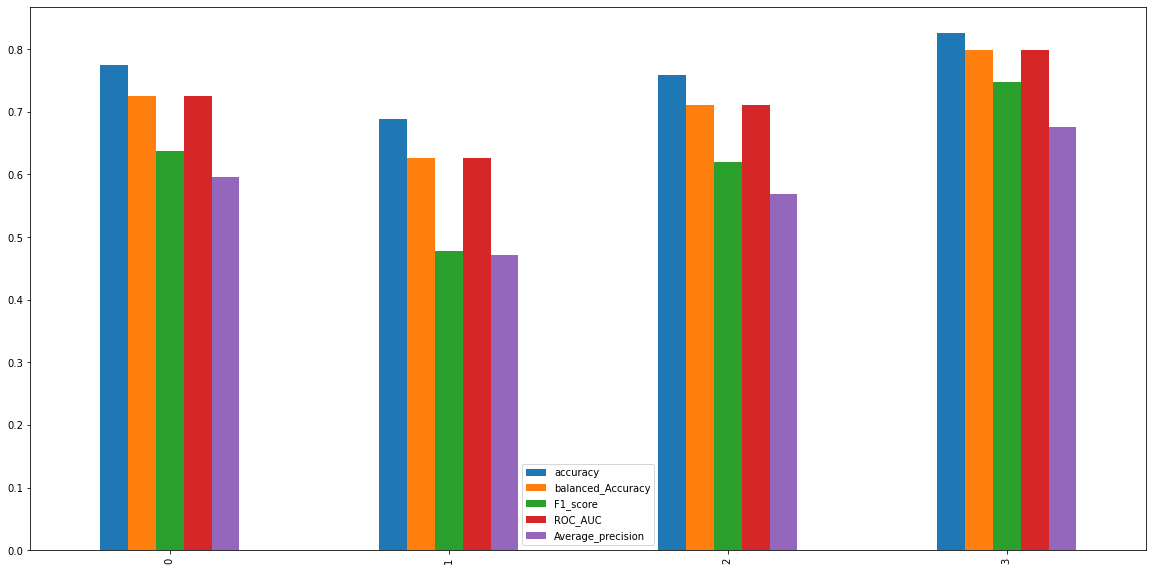

In [50]:
### Your code here (a)
my_dict = {"model" : ["KNN","Naive Bayes","Decision Tree","Xboost"],
"accuracy" : Accuracy_list,
"balanced_Accuracy" :Balanced_accuracy_list,
"F1_score":F1_score_list,
"ROC_AUC":ROC_AUC_list,
"Average_precision":Average_precision_list}
col_names = ["model","accuracy","balanced_Accuracy","F1_score","ROC_AUC","Average_precision"]
df = pd.DataFrame(my_dict,columns=col_names)
print(df)
df.plot(kind="bar")

###### Your answer to (b) here
Xboost performance the best as its accuracy,balanced_Accuracy,F1_score,ROC_AUC is the best among the other estimators,KNN is on second number ,and the Tree classifier is on third the Naive Bayes performs the worst among all estmators as its accuracy,balacnced accuracy has the worst results.

###### Your answer to (c) here
Xboost performance the best as its accuracy,balanced_Accuracy,F1_score,ROC_AUC is the best among the other estimators,KNN is on second number ,and the Tree classifier is on third the Naive Bayes performs the worst among all estmators as its accuracy,balacnced accuracy has the worst results.

### Question 4
Using your best overall model, plot the following:

#### (a)
Confusion Matrix (appropriate labels should be shown)

#### (b)
Precision Recall curve

#### (c)
ROC curve (Also show ROC for random classifier on the same plot)

In [40]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,RocCurveDisplay

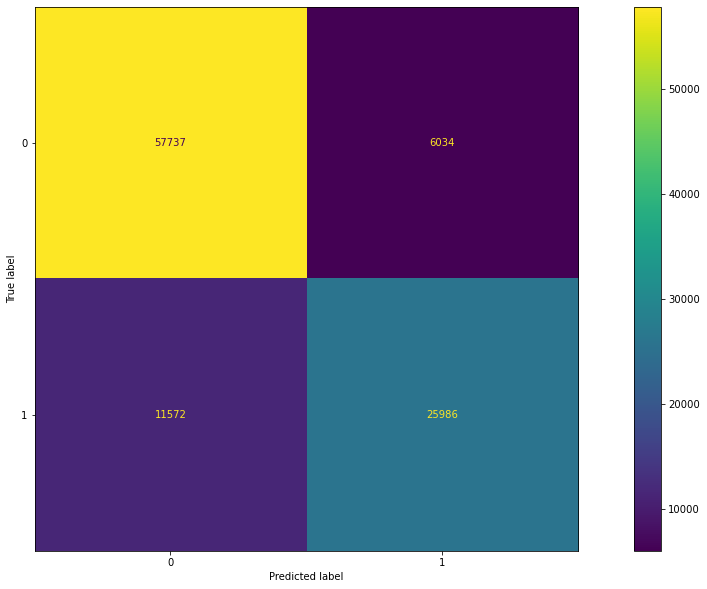

In [41]:
matrix = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(matrix).plot()

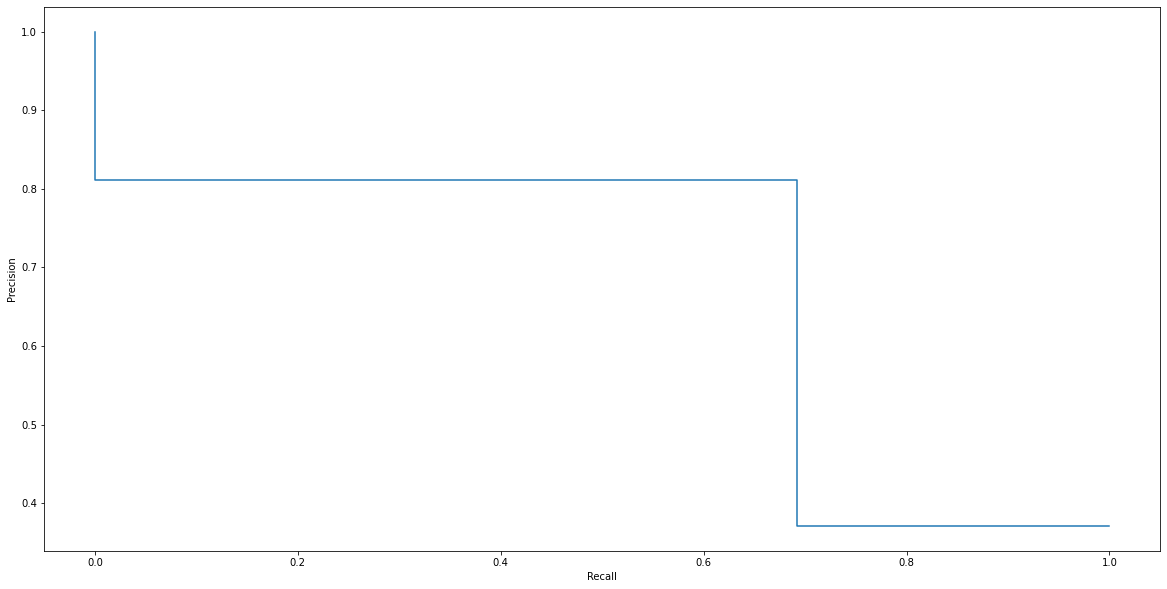

In [42]:
#part b
precision, recall, threshold = precision_recall_curve(test_y, y_pred)
PrecisionRecallDisplay(precision=precision,recall=recall).plot()

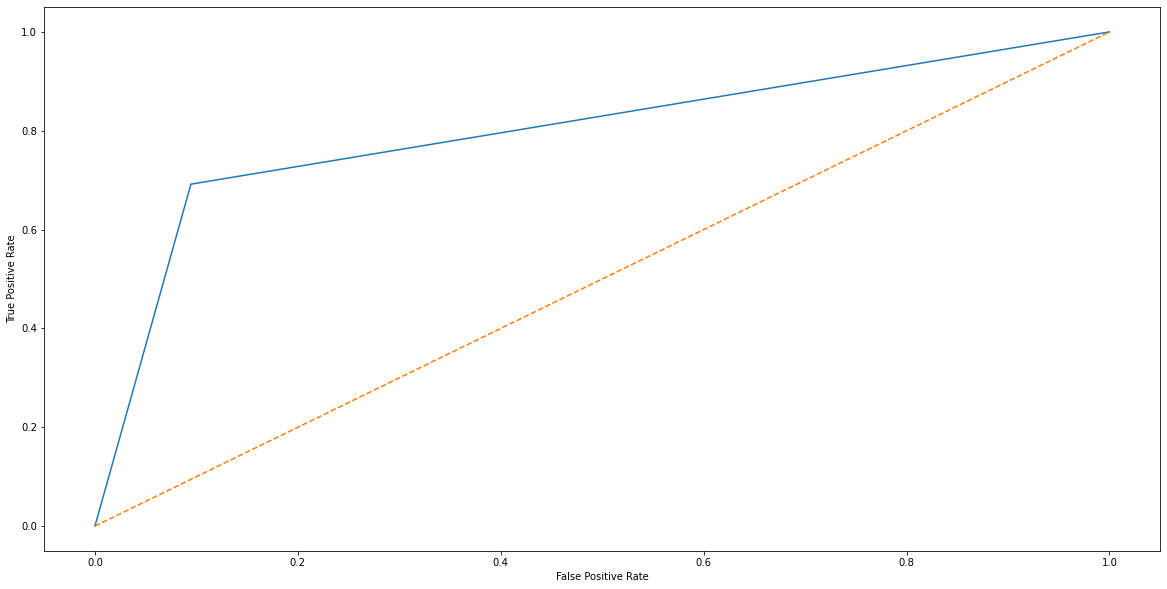

In [43]:
#part c
fpr, tpr,_ = roc_curve(test_y, y_pred,pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.plot([0,1],[0,1],linestyle='--')